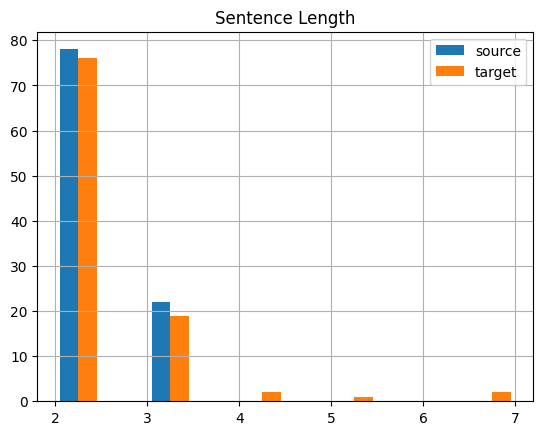

In [1]:
%load_ext autoreload
%autoreload 2
from naml.dataset import Datasets, DatasetRemote
from naml.text import split_multi
datasets = Datasets("~/naml-data")
table = datasets.fetch(DatasetRemote(
    "fra-eng", "https://www.manythings.org/anki/fra-eng.zip"
)).as_zip().read('fra.txt').decode('utf-8').lower()

num_examples = 100

lines = table.split('\n')[:num_examples]
lines = [line.split('\t')[:2] for line in lines]
lines = [line for line in lines if len(line) == 2]
source, target = [line[0] for line in lines], [line[-1] for line in lines]
source = [list(split_multi(line, '!.:;?',' ')) for line in source]
target = [list(split_multi(line, '!.:;?',' ')) for line in target]
from naml import plot
plot.histogram(
    [[len(x) for x in source],[len(x) for x in target]],
    legend=['source', 'target'],
    title='Sentence Length',    
)


In [2]:
from naml.text import Vocabulary
corpus = Vocabulary.to_corpus(source)
vocab = Vocabulary(corpus, min_freq=2)
print(len(vocab))

31


In [3]:
print(source[0])
vocab.truncate_pad(vocab.to_indices(source[0]), 10)

['go', '.']


tensor([7, 3, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
src_corpus, tgt_corpus = Vocabulary.to_corpus(source), Vocabulary.to_corpus(target)
src_vocab, tgt_vocab = Vocabulary(src_corpus), Vocabulary(tgt_corpus)
from naml.modules import torch
from naml.sequence import seq_batched_sample_iter
def translation_data_iter(batch_size: int, num_steps: int):
    X, X_len = src_vocab.to_indices_padded(source,num_steps)
    Y, Y_len = tgt_vocab.to_indices_padded(target,num_steps)
    for x, x_len, y, y_len in zip(
        seq_batched_sample_iter(X, batch_size),
        seq_batched_sample_iter(X_len, batch_size),
        seq_batched_sample_iter(Y, batch_size),
        seq_batched_sample_iter(Y_len, batch_size)
    ):
        yield x, x_len, y, y_len
        
for x, x_len, y, y_len in translation_data_iter(2, 10):
    print(x, x_len, y, y_len,sep='\n')
    for i in range(len(x)):
        print(src_vocab.to_tokens(x[0][:x_len[0]]), tgt_vocab.to_tokens(y[0][:y_len[0]]),sep='\n')
    

tensor([[7, 3, 1, 1, 1, 1, 1, 1, 1, 1],
        [7, 3, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([2, 2])
tensor([[31,  3,  1,  1,  1,  1,  1,  1,  1,  1],
        [32,  4,  1,  1,  1,  1,  1,  1,  1,  1]])
tensor([2, 2])
['go', '.']
['va', '!']
['go', '.']
['va', '!']
tensor([[7, 3, 1, 1, 1, 1, 1, 1, 1, 1],
        [7, 3, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([2, 2])
tensor([[33, 34,  3,  1,  1,  1,  1,  1,  1,  1],
        [35,  3,  1,  1,  1,  1,  1,  1,  1,  1]])
tensor([3, 2])
['go', '.']
['en', 'route', '!']
['go', '.']
['en', 'route', '!']
tensor([[24,  3,  1,  1,  1,  1,  1,  1,  1,  1],
        [24,  3,  1,  1,  1,  1,  1,  1,  1,  1]])
tensor([2, 2])
tensor([[6, 3, 1, 1, 1, 1, 1, 1, 1, 1],
        [6, 4, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([2, 2])
['hi', '.']
['salut', '!']
['hi', '.']
['salut', '!']
tensor([[5, 4, 1, 1, 1, 1, 1, 1, 1, 1],
        [5, 4, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([2, 2])
tensor([[12,  3,  1,  1,  1,  1,  1,  1,  1,  1],
        [13,  3,  1,  1,  1,  1,  1,  1,  1,  1]])